In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Sales data.csv')

In [4]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Work on order date

In [5]:
df['Order_Year'] = df['Order Date'].str.split('-').str[0]
df['Order_month'] = df['Order Date'].str.split('-').str[1]
df['Order_Days'] = df['Order Date'].str.split('-').str[2]

In [7]:
df['Order_Day'] = df['Order_Days'].str.split(':').str[0].str.split().str[0]
df['Order_hr'] = df['Order_Days'].str.split(':').str[0].str.split(' ').str[1]
df['Order_min'] = df['Order_Days'].str.split(':').str[1].str.split(':').str[0]
df['Order_sec'] = df['Order_Days'].str.split(':').str[2].str.split(':').str[0]

In [9]:
df.drop('Order Date', axis = 1, inplace = True)

In [10]:
df.drop('Order_Days', axis = 1, inplace = True)

In [11]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Order_Year,Order_month,Order_Day,Order_hr,Order_min,Order_sec
0,0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,12,30,00,01,00
1,1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,12,29,07,03,00
2,2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,12,12,18,21,00
3,3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,12,22,15,13,00
4,4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,12,18,12,38,00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
 10  Order_Year        185950 non-null  object 
 11  Order_month       185950 non-null  object 
 12  Order_Day         185950 non-null  object 
 13  Order_hr          185950 non-null  object 
 14  Order_min         185950 non-null  object 
 15  Order_sec         185950 non-null  object 
dtypes: float64(2), int64

In [13]:
## convert all Order details in numerical features
df['Order_Year'] = df['Order_Year'].astype(int)
df['Order_month'] = df['Order_month'].astype(int)
df['Order_Day'] = df['Order_Day'].astype(int)
df['Order_hr'] = df['Order_hr'].astype(int)
df['Order_min'] = df['Order_min'].astype(int)
df['Order_sec'] = df['Order_sec'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
 10  Order_Year        185950 non-null  int32  
 11  Order_month       185950 non-null  int32  
 12  Order_Day         185950 non-null  int32  
 13  Order_hr          185950 non-null  int32  
 14  Order_min         185950 non-null  int32  
 15  Order_sec         185950 non-null  int32  
dtypes: float64(2), int32

In [16]:
df['Quantity Ordered'].unique()

array([1, 2, 4, 3, 7, 5, 6, 8, 9], dtype=int64)

In [17]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [18]:
df[df.duplicated()]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Order_Year,Order_month,Order_Day,Order_hr,Order_min,Order_sec


## there is no Duplicate values

## Statistical analysis

## * here is showing that sec of the table is always zero so we want to deop it

In [20]:
df.drop('Order_sec', axis = 1, inplace = True)

In [23]:
## Here we want to drop hour column
df.drop('Hour', axis = 1, inplace = True)

In [24]:
df.drop('Month', axis = 1, inplace = True) 

In [25]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,City,Order_Year,Order_month,Order_Day,Order_hr,Order_min
0,0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",1700.00,New York City,2019,12,30,0,1
1,1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",600.00,New York City,2019,12,29,7,3
2,2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",11.95,New York City,2019,12,12,18,21
3,3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",149.99,San Francisco,2019,12,22,15,13
4,4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",11.95,Atlanta,2019,12,18,12,38


In [26]:
## here we add a column for mean fo price each and sales
df['Price_Each_Sales'] = (df['Price Each'] + df['Sales'])/2

In [27]:
df.drop('Price Each', axis = 1, inplace = True)
df.drop('Sales', axis = 1, inplace = True)

In [68]:
df['Perchase_Location'] = df['Purchase Address'].str.split(',').str[0]
#df['Purchase Address'].str.split(',').str[1]
df['Pin_code'] = df['Purchase Address'].str.split(',').str[2]

In [70]:
df['Perchase_City'] = df['Purchase Address'].str.split(',').str[1]

In [72]:
df.drop('Purchase Address', axis = 1, inplace = True)
df.drop('City', axis = 1, inplace = True)

In [73]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Order_Year,Order_month,Order_Day,Order_hr,Order_min,Price_Each_Sales,Perchase_Location,Pin_code,Perchase_City
0,0,295665,Macbook Pro Laptop,1,2019,12,30,0,1,1700.00,136 Church St,NY 10001,New York City
1,1,295666,LG Washing Machine,1,2019,12,29,7,3,600.00,562 2nd St,NY 10001,New York City
2,2,295667,USB-C Charging Cable,1,2019,12,12,18,21,11.95,277 Main St,NY 10001,New York City
3,3,295668,27in FHD Monitor,1,2019,12,22,15,13,149.99,410 6th St,CA 94016,San Francisco
4,4,295669,USB-C Charging Cable,1,2019,12,18,12,38,11.95,43 Hill St,GA 30301,Atlanta


In [78]:
df['Pin_code'].unique()

array([' NY 10001', ' CA 94016', ' GA 30301', ' OR 97035', ' TX 75001',
       ' CA 90001', ' MA 02215', ' TX 73301', ' ME 04101', ' WA 98101'],
      dtype=object)

In [74]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Order_Year,Order_month,Order_Day,Order_hr,Order_min,Price_Each_Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,2019.000183,7.059140,15.759532,14.413305,29.481361,184.945326
std,5450.554093,51512.737110,0.442793,0.013521,3.502996,8.782176,5.423416,17.317573,332.759221
min,0.000000,141234.000000,1.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,2.990000
25%,3894.000000,185831.250000,1.000000,2019.000000,4.000000,8.000000,11.000000,14.000000,11.950000
50%,7786.000000,230367.500000,1.000000,2019.000000,7.000000,16.000000,15.000000,29.000000,14.950000
75%,11872.000000,275035.750000,1.000000,2019.000000,10.000000,23.000000,19.000000,45.000000,150.000000
max,25116.000000,319670.000000,9.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,2550.000000


## here how we find the numerical features and categorical features 


In [75]:
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

# print columns
print('we have {} numeric features : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical feature : {}'.format(len(categorical_features), categorical_features))

we have 9 numeric features : ['Unnamed: 0', 'Order ID', 'Quantity Ordered', 'Order_Year', 'Order_month', 'Order_Day', 'Order_hr', 'Order_min', 'Price_Each_Sales']

we have 4 categorical feature : ['Product', 'Perchase_Location', 'Pin_code', 'Perchase_City']


## Analysis the numerical feature 

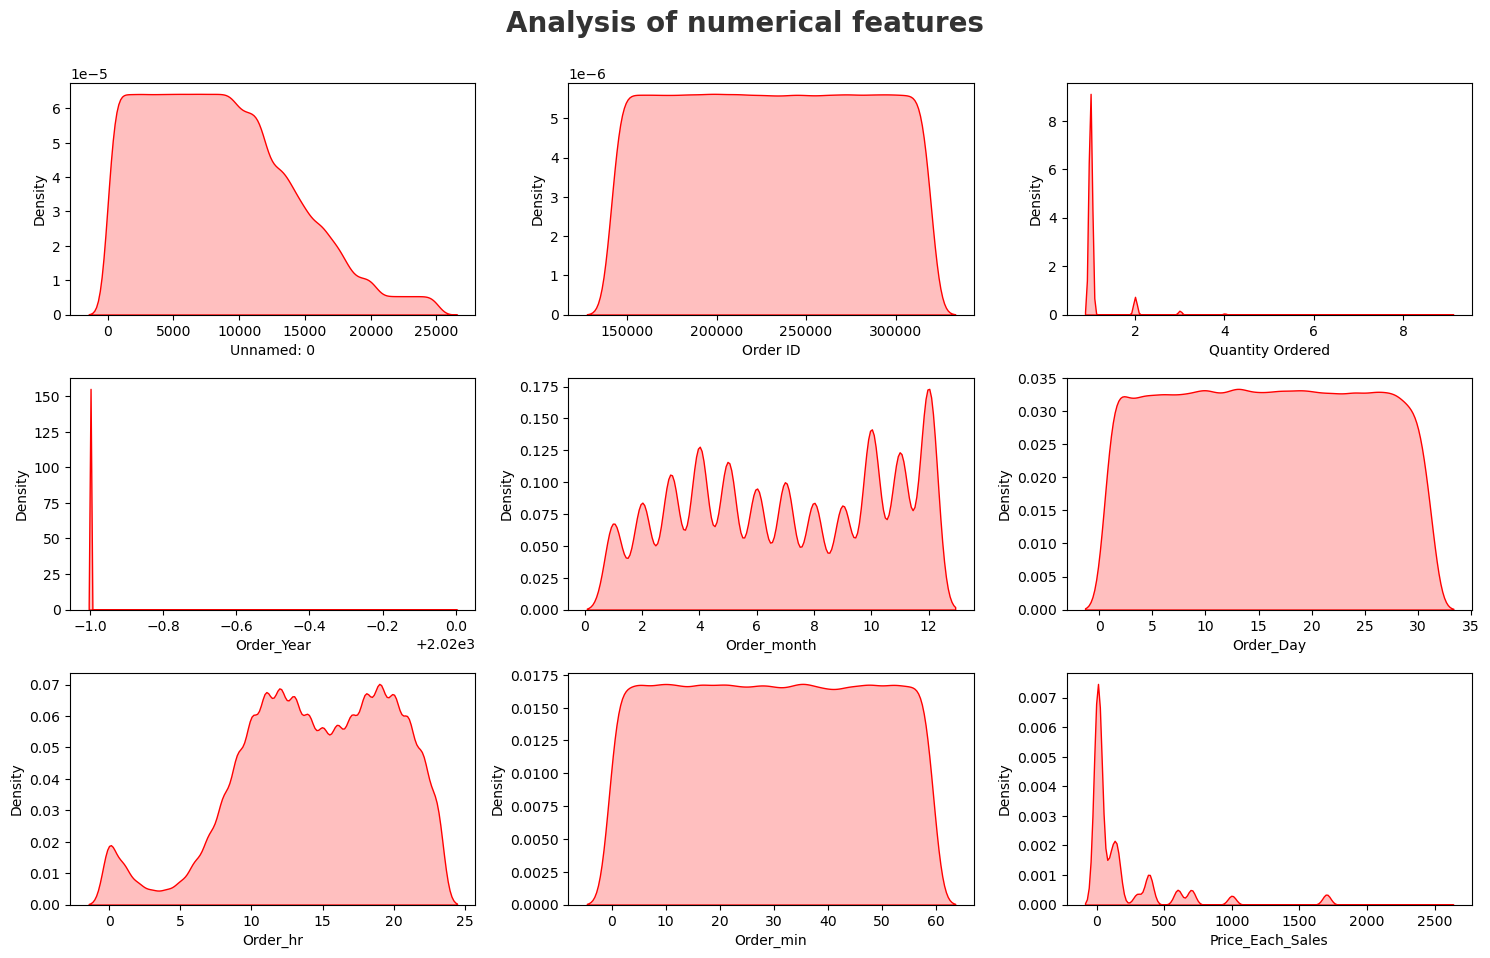

In [76]:
# data Visualization 
plt.figure(figsize=(15,15))
plt.suptitle('Analysis of numerical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[numeric_features[i]], shade = True, color = 'r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

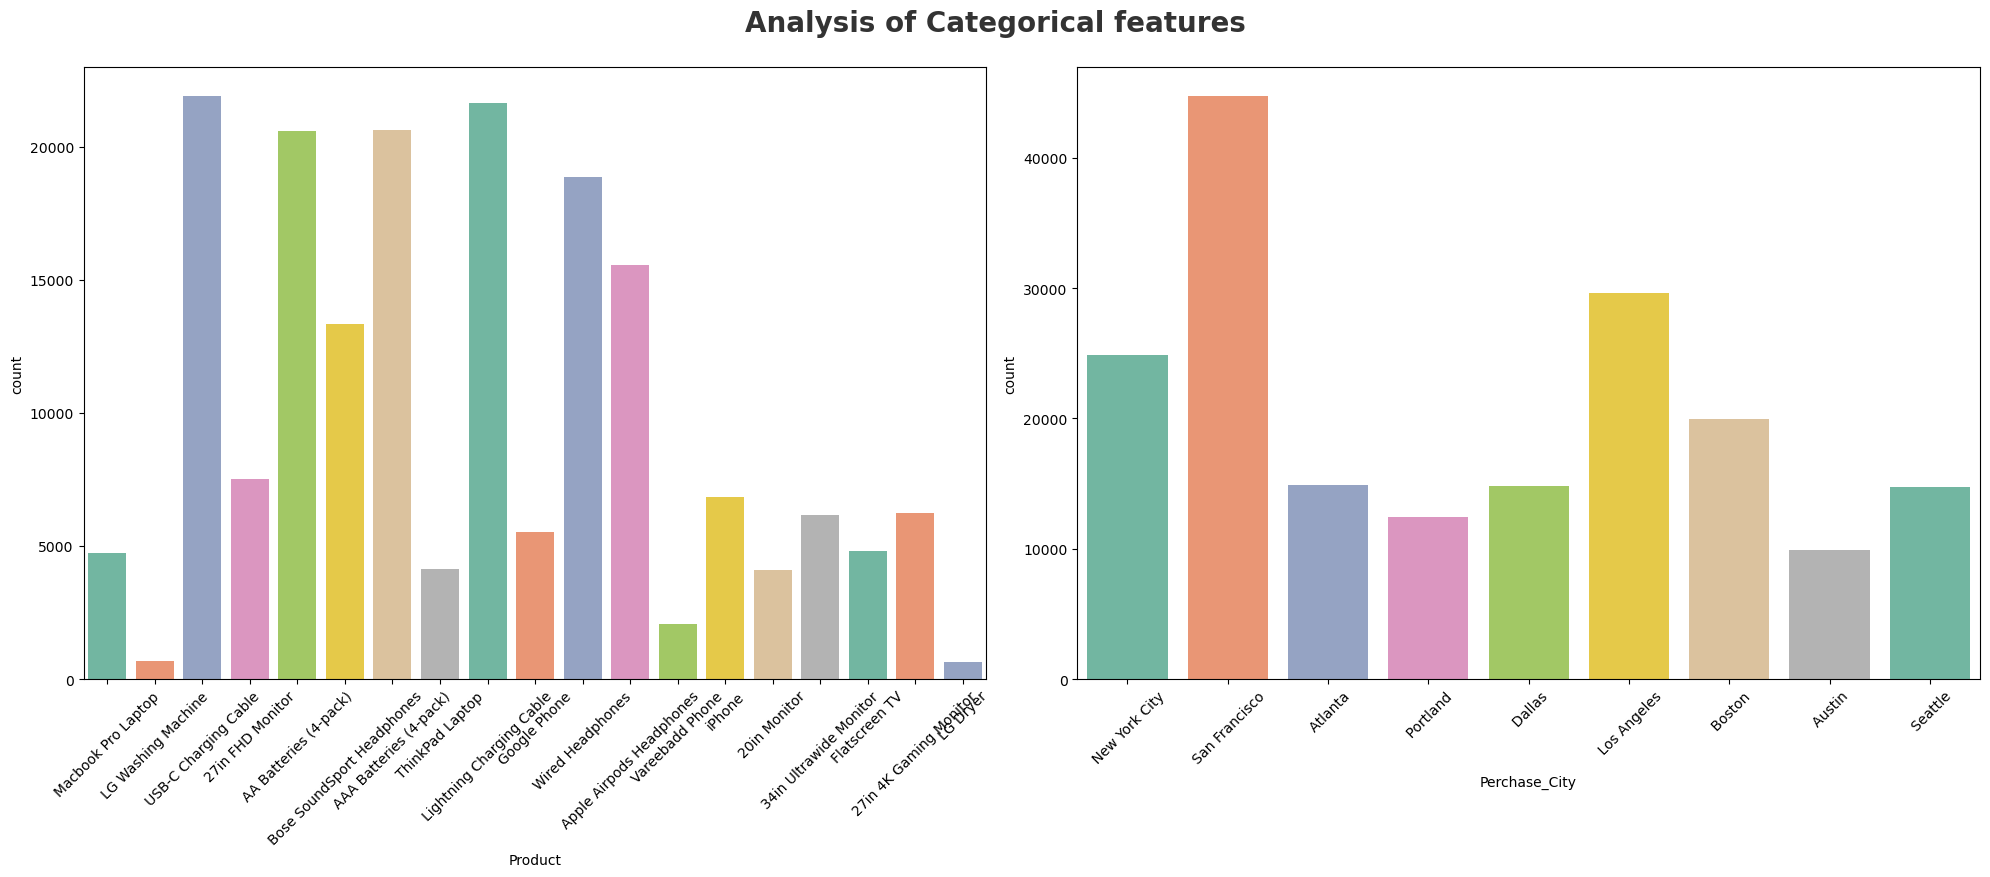

In [77]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['Product', 'Perchase_City']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Analysis
* The maximum selling prodeuct is USB-C charging cable 
* The least selling produt is LG Washing Machine and LG Dryer
* The maximum product goes to the San Franciso city
* The least product goes to the Austin city

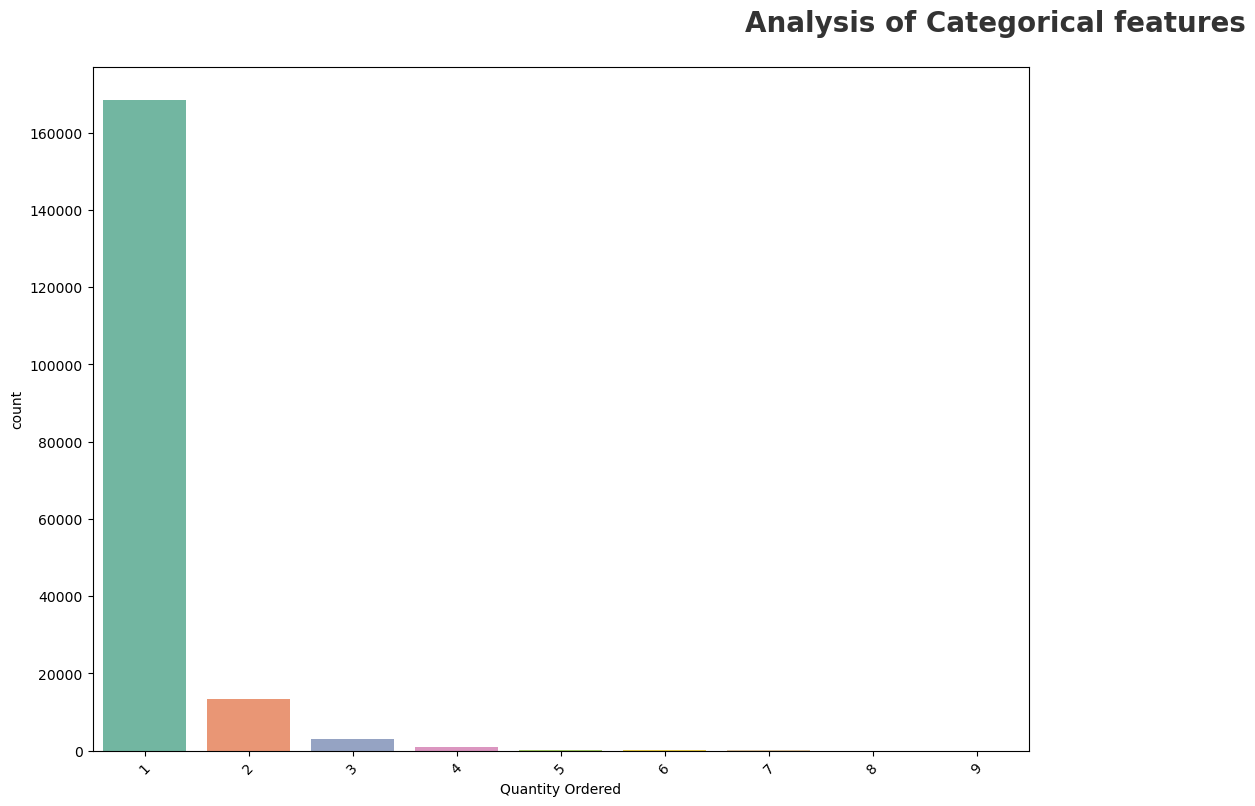

In [34]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['Quantity Ordered']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

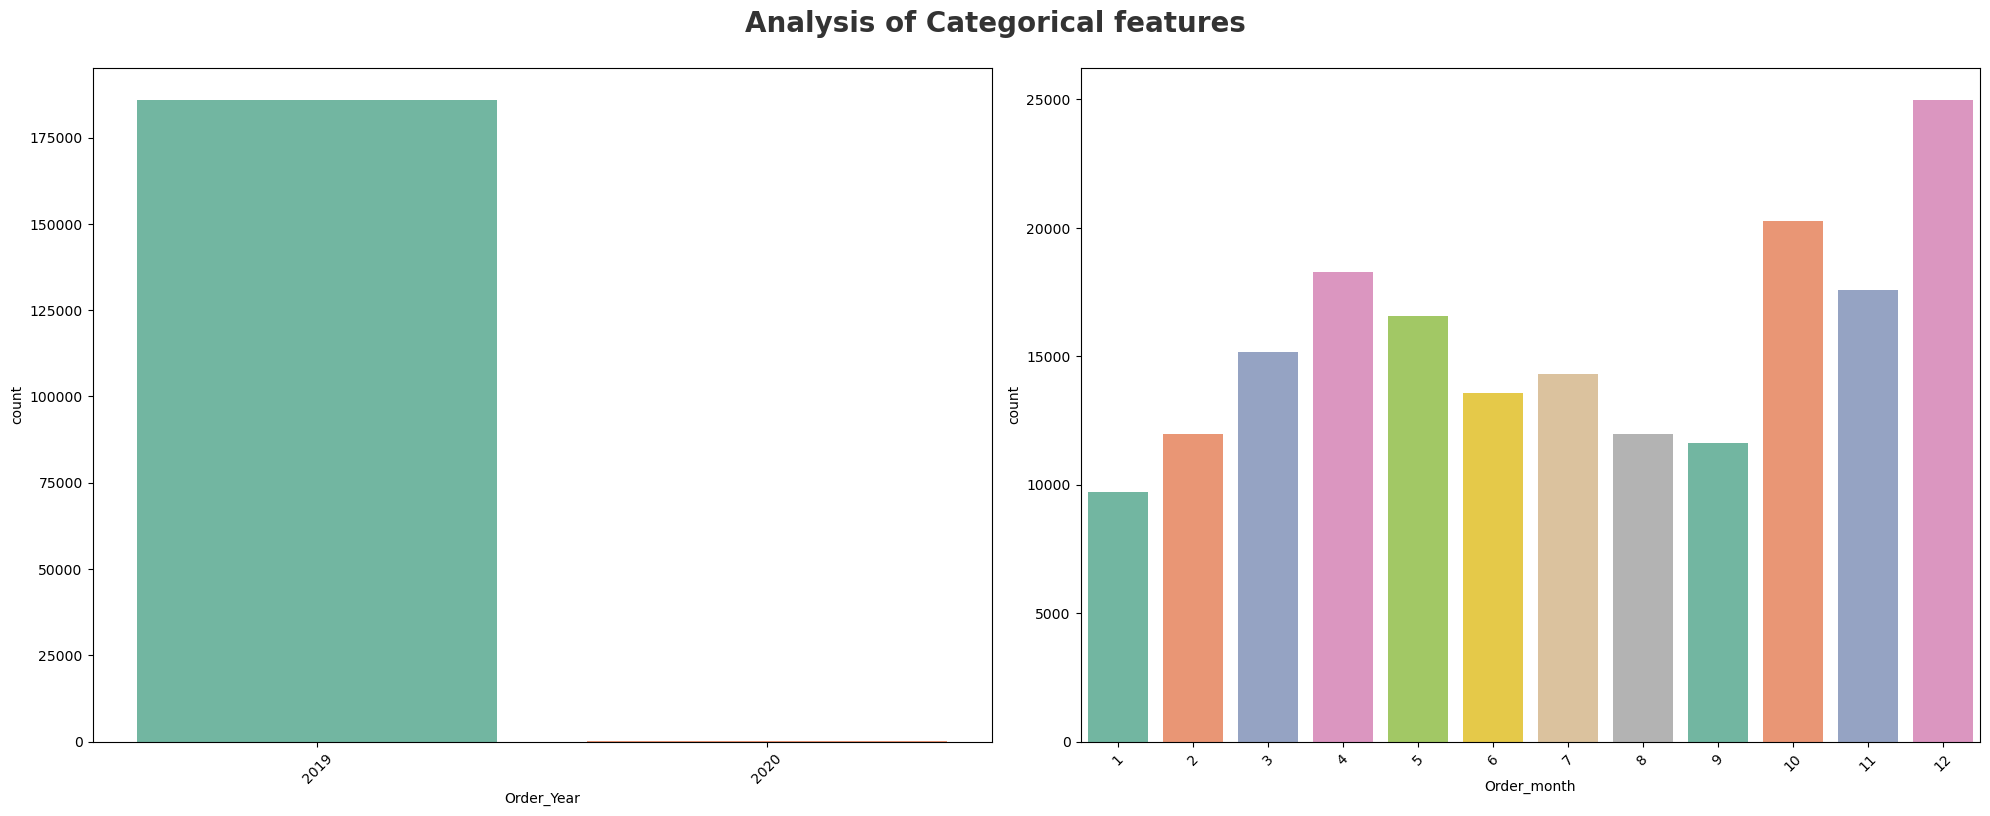

In [36]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['Order_Year', 'Order_month']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Analysis 
* The maximum sale is done in the year of 2019
* The maximum month where the sale is done is 12th that is December and which is the cristimas sale may be 
* The least sale is in the month of January which is 1st month

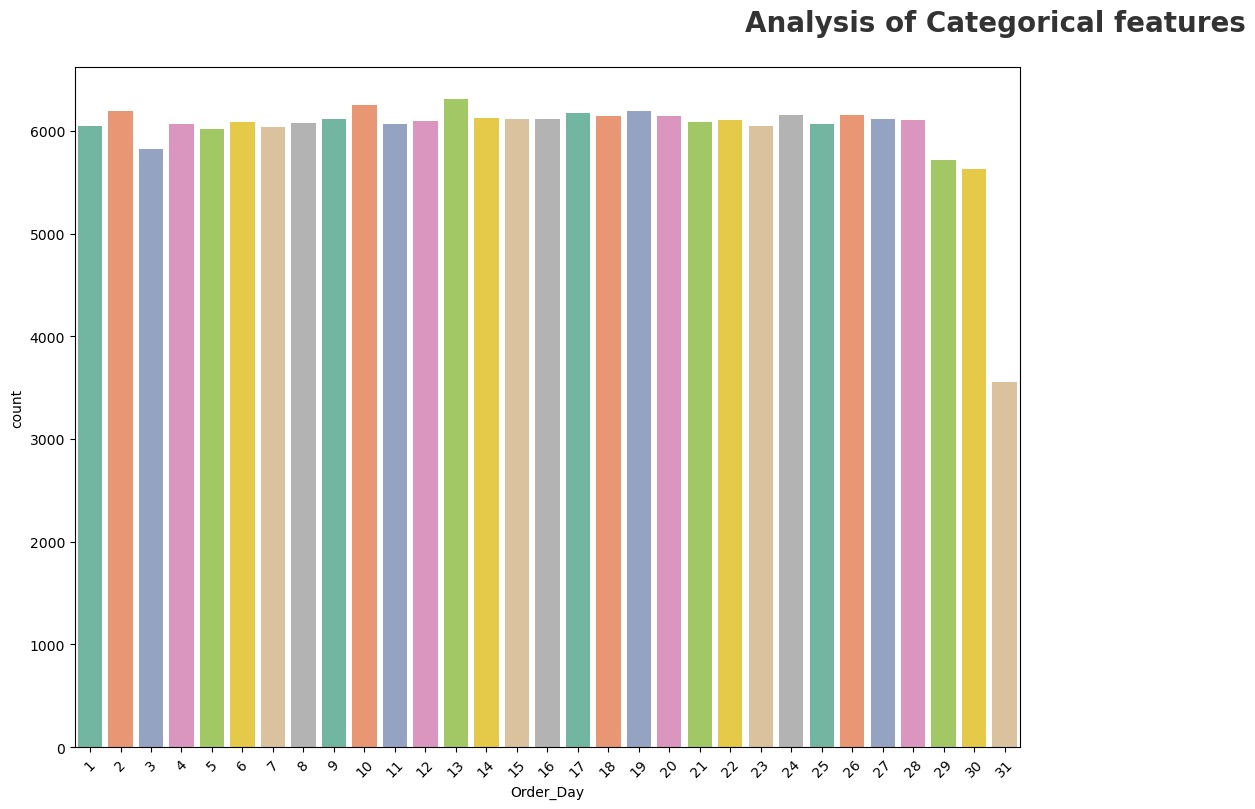

In [38]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['Order_Day']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Analysis 
* According to the graph the Days of Order have the same in all Day in the months

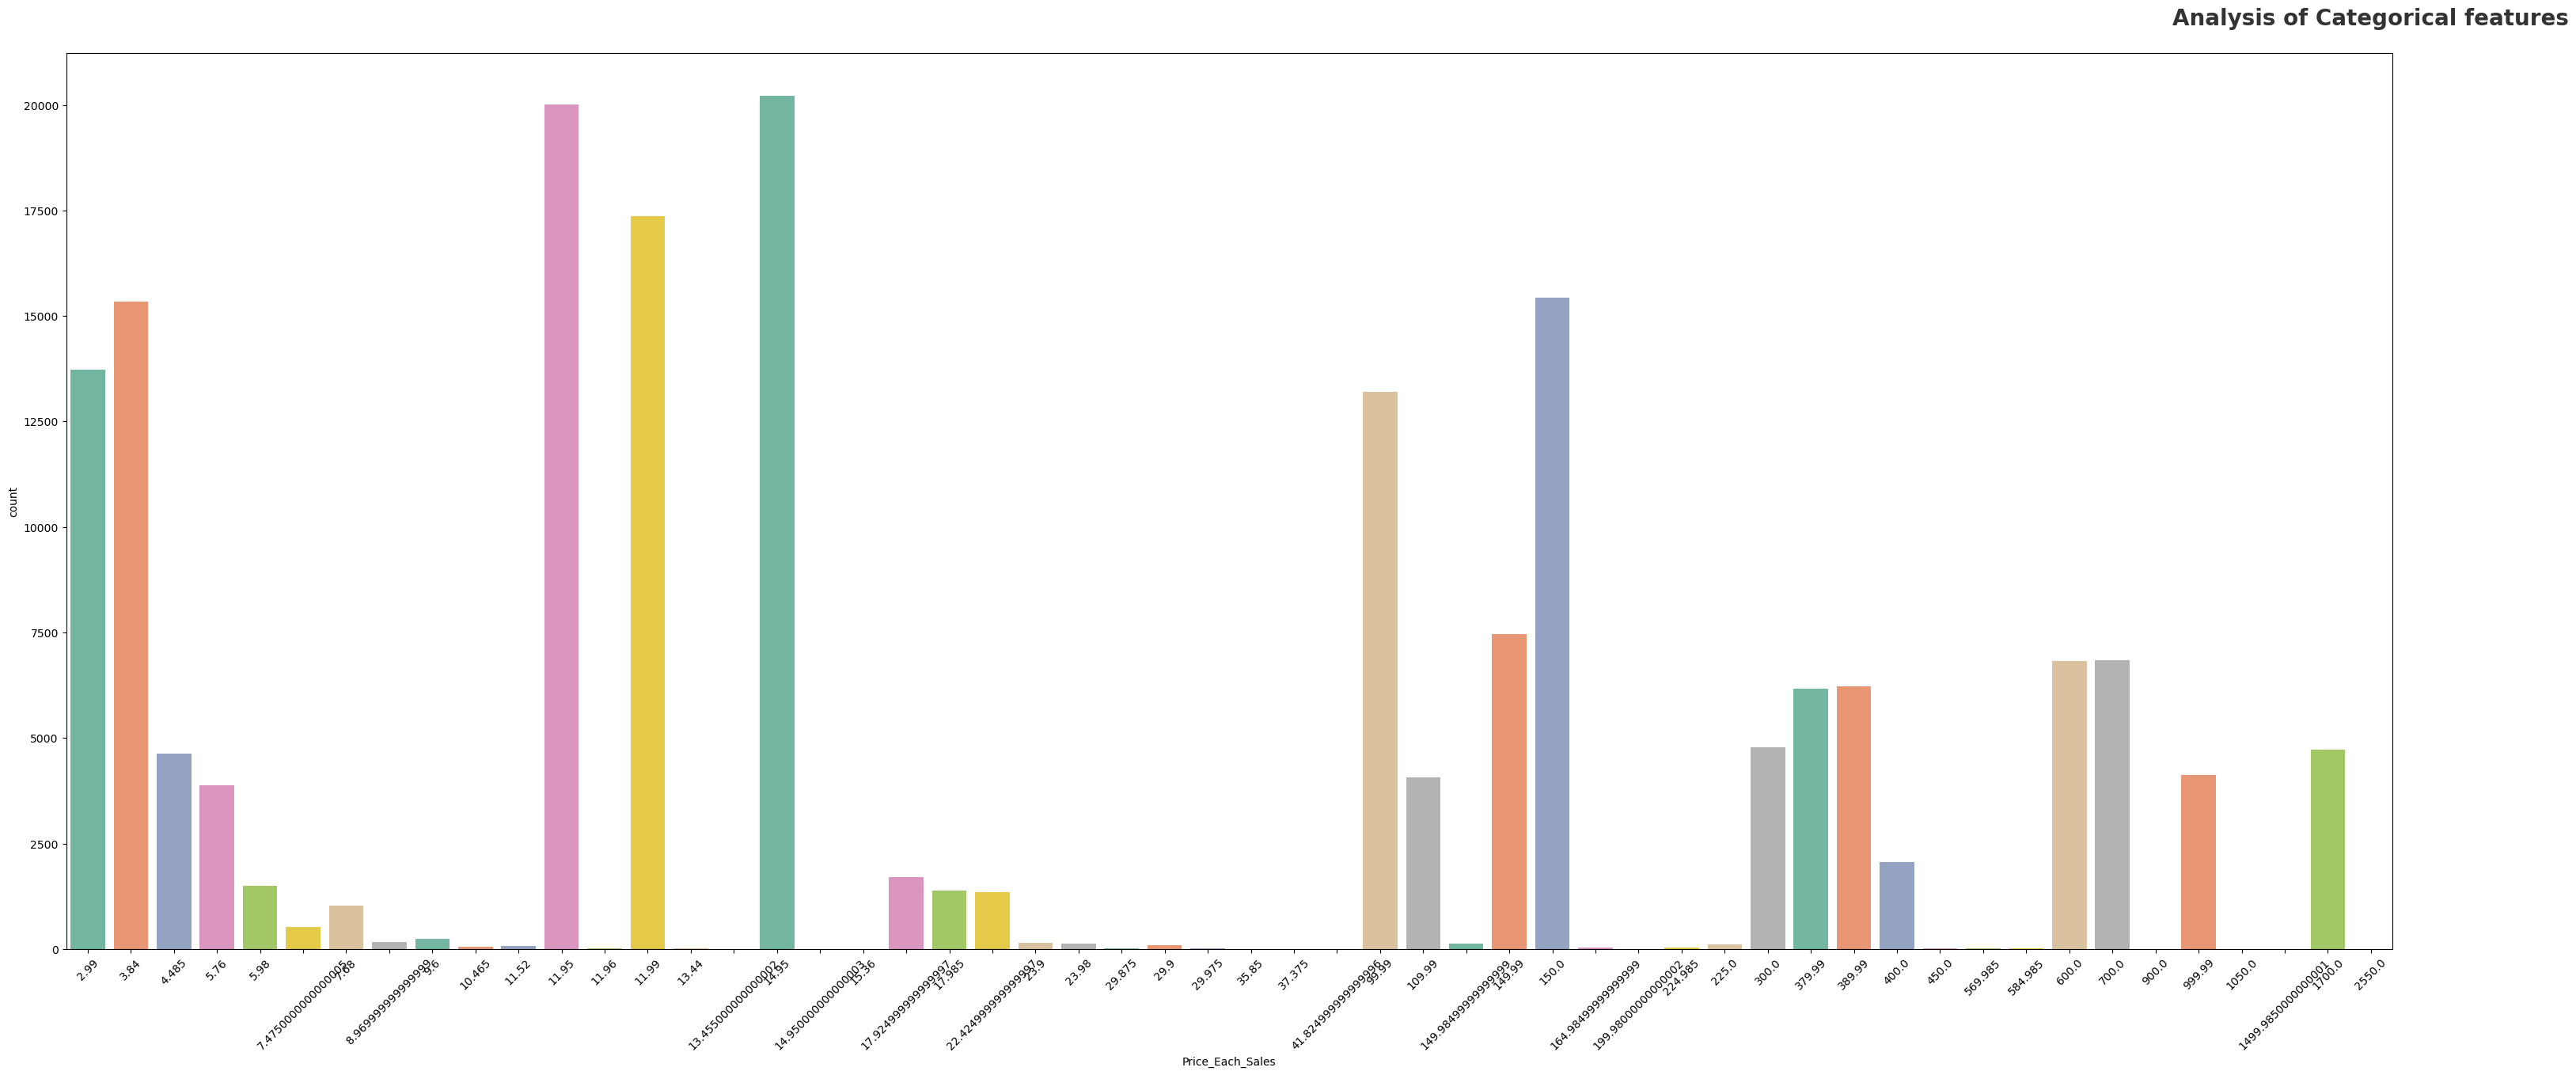

In [46]:
plt.figure(figsize=(60, 25))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['Price_Each_Sales']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

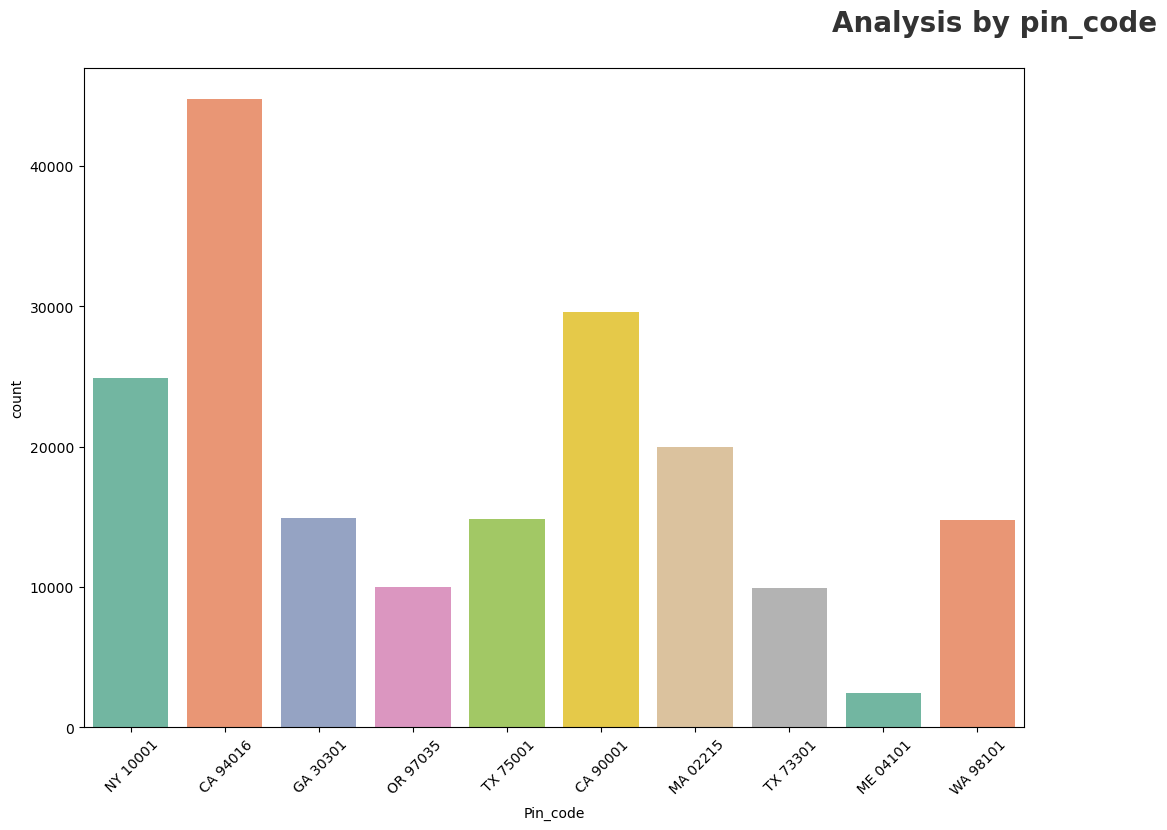

In [81]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis by pin_code', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['Pin_code']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [82]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Order_Year,Order_month,Order_Day,Order_hr,Order_min,Price_Each_Sales,Perchase_Location,Pin_code,Perchase_City
0,0,295665,Macbook Pro Laptop,1,2019,12,30,0,1,1700.00,136 Church St,NY 10001,New York City
1,1,295666,LG Washing Machine,1,2019,12,29,7,3,600.00,562 2nd St,NY 10001,New York City
2,2,295667,USB-C Charging Cable,1,2019,12,12,18,21,11.95,277 Main St,NY 10001,New York City
3,3,295668,27in FHD Monitor,1,2019,12,22,15,13,149.99,410 6th St,CA 94016,San Francisco
4,4,295669,USB-C Charging Cable,1,2019,12,18,12,38,11.95,43 Hill St,GA 30301,Atlanta


## what are the Top 10 product is selling

In [83]:
category = pd.DataFrame(df['Product'].value_counts())
category.rename(columns = {'Category':'Counts'},inplace=True)

In [84]:
category

,count
Product,
USB-C Charging Cable,21903
Lightning Charging Cable,21658
AAA Batteries (4-pack),20641
AA Batteries (4-pack),20577
Wired Headphones,18882
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
27in FHD Monitor,7507
iPhone,6842


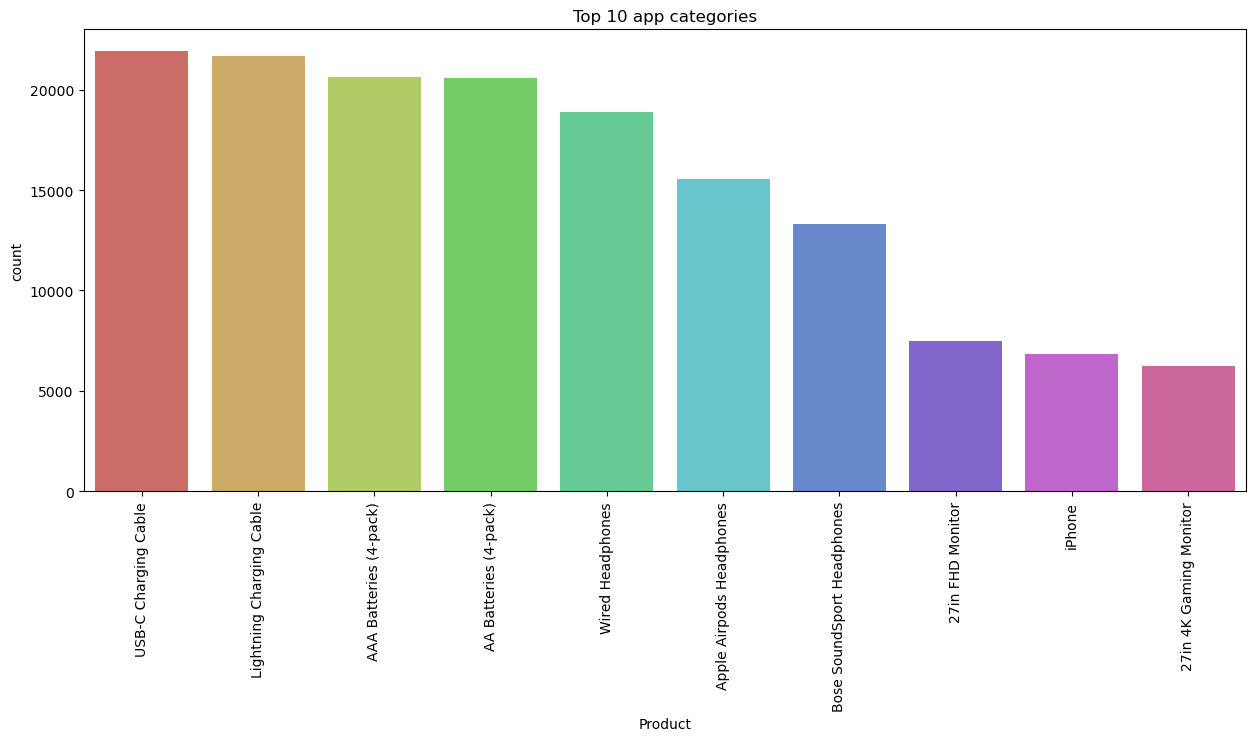

In [85]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y = 'count',data = category[:10],palette='hls')
plt.title('Top 10 app categories')
plt.xticks(rotation=90)
plt.show()

## Analysis 
* The above you see this is the to 10 selling product 

## Top 10 best locaiton for open a shop from which the product perchase increase 

In [86]:
category = pd.DataFrame(df['Perchase_Location'].value_counts())
category.rename(columns = {'Category':'Counts'},inplace=True)

In [87]:
category

,count
Perchase_Location,
986 7th St,14
640 West St,14
732 Highland St,14
753 Cedar St,14
594 6th St,14
...,...
566 1st St,1
103 West St,1
825 Willow St,1


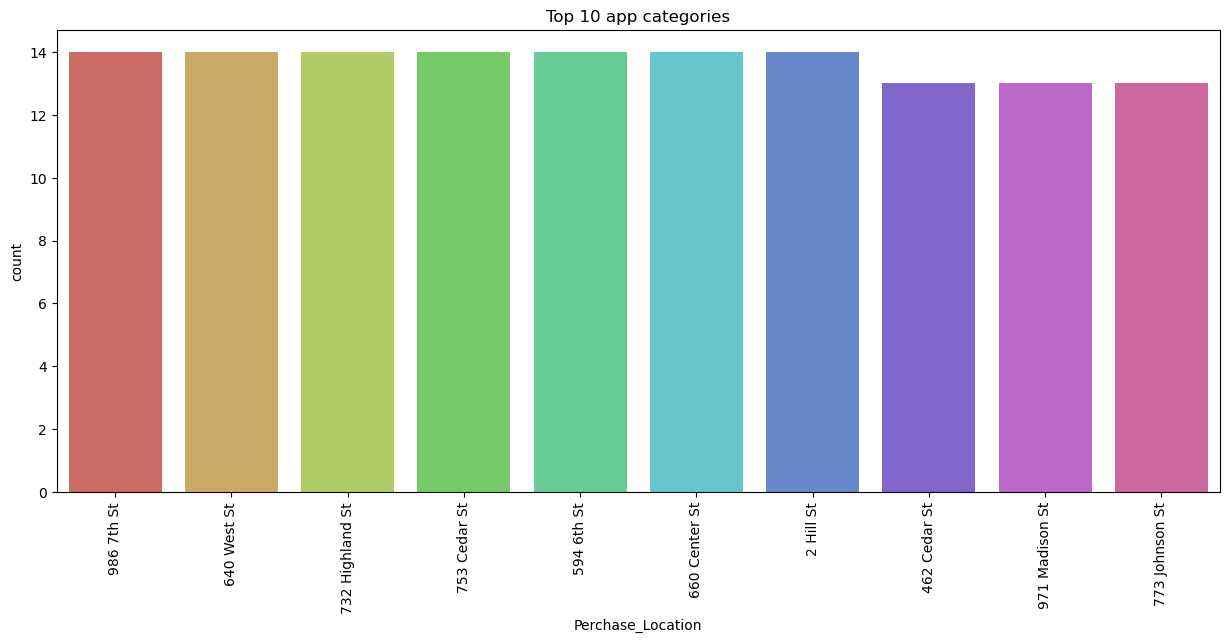

In [89]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y = 'count',data = category[:10],palette='hls')
plt.title('Top 10 app categories')
plt.xticks(rotation=90)
plt.show()

## Analysis
* Best place for open a shop is above 
1. 986 7th st
2. 640 west st
3. 732 cadar st
4. 594 6th st
5. 660 center st
6. 2 hills st